# 디스크 컨트롤러

**문제 설명**

하드디스크는 한 번에 하나의 작업만 수행할 수 있습니다. 디스크 컨트롤러를 구현하는 방법은 여러 가지가 있습니다. 가장 일반적인 방법은 요청이 들어온 순서대로 처리하는 것입니다.

예를들어

```
- 0ms 시점에 3ms가 소요되는 A작업 요청
- 1ms 시점에 9ms가 소요되는 B작업 요청
- 2ms 시점에 6ms가 소요되는 C작업 요청
```
와 같은 요청이 들어왔습니다. 이를 그림으로 표현하면 아래와 같습니다.

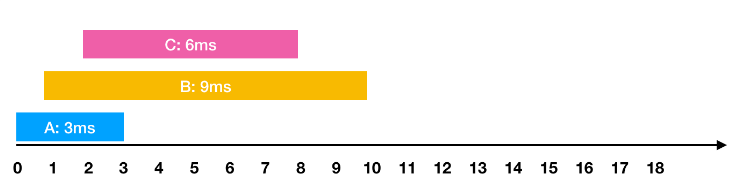

한 번에 하나의 요청만을 수행할 수 있기 때문에 각각의 작업을 요청받은 순서대로 처리하면 다음과 같이 처리 됩니다.

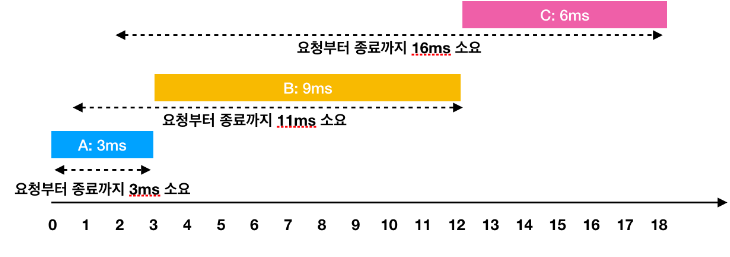

- A: 3ms 시점에 작업 완료 (요청에서 종료까지 : 3ms)
- B: 1ms부터 대기하다가, 3ms 시점에 작업을 시작해서 12ms 시점에 작업 완료(요청에서 종료까지 : 11ms)
- C: 2ms부터 대기하다가, 12ms 시점에 작업을 시작해서 18ms 시점에 작업 완료(요청에서 종료까지 : 16ms)

이 때 각 작업의 요청부터 종료까지 걸린 시간의 평균은 `10ms`(= (3 + 11 + 16) / 3)가 됩니다.

하지만 `A → C → B` 순서대로 처리하면

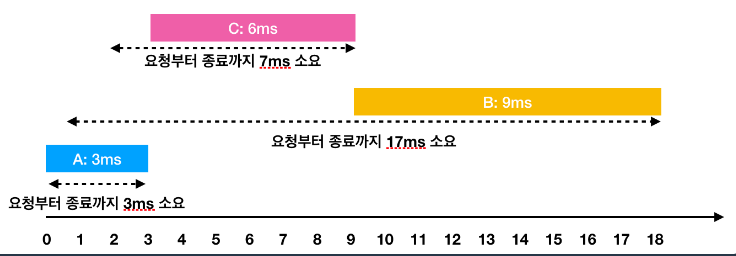
- A: 3ms 시점에 작업 완료(요청에서 종료까지 : 3ms)
- C: 2ms부터 대기하다가, 3ms 시점에 작업을 시작해서 9ms 시점에 작업 완료(요청에서 종료까지 : 7ms)
- B: 1ms부터 대기하다가, 9ms 시점에 작업을 시작해서 18ms 시점에 작업 완료(요청에서 종료까지 : 17ms)

이렇게 `A → C → B`의 순서로 처리하면 각 작업의 요청부터 종료까지 걸린 시간의 평균은 `9ms`(= (3 + 7 + 17) / 3)가 됩니다.

각 작업에 대해 [작업이 요청되는 시점, 작업의 소요시간]을 담은 2차원 배열 `jobs`가 매개변수로 주어질 때, 작업의 요청부터 종료까지 걸린 시간의 평균을 가장 줄이는 방법으로 처리하면 평균이 얼마가 되는지 return 하도록 solution 함수를 작성해주세요. (단, 소수점 이하의 수는 버립니다)

**제한 사항**

- jobs의 길이는 1 이상 500 이하입니다.
- jobs의 각 행은 하나의 작업에 대한 [작업이 요청되는 시점, 작업의 소요시간] 입니다.
- 각 작업에 대해 작업이 요청되는 시간은 0 이상 1,000 이하입니다.
- 각 작업에 대해 작업의 소요시간은 1 이상 1,000 이하입니다.
- 하드디스크가 작업을 수행하고 있지 않을 때에는 먼저 요청이 들어온 작업부터 처리합니다.

**입출력 예**

|jobs|	return|
|:---:|:---:|
|[[0, 3], [1, 9], [2, 6]]|	9|

**입출력 예 설명**

문제에 주어진 예와 같습니다.

- 0ms 시점에 3ms 걸리는 작업 요청이 들어옵니다.
- 1ms 시점에 9ms 걸리는 작업 요청이 들어옵니다.
- 2ms 시점에 6ms 걸리는 작업 요청이 들어옵니다.

In [73]:
# 작업 시간 계산

from collections import deque

def solution(jobs):

    total_time = 0
    running_queue = jobs[:1]
    waiting_queue = sorted(jobs[1:])
    ready_queue = []
    finish_time = 0
    
    while True:
        
        # 종료 조건
        if not running_queue and not ready_queue and not waiting_queue:
            return total_time
        
        # running_queue에 작업이 존재하면 소요시간 계산
        print(f"running_queue : {running_queue}")
        if running_queue:
            
            # 현재 작업 종료
            curr_job = running_queue.pop(0) # (시작시간, 소요시간)
            start_time = curr_job[0]
            finish_time = start_time + curr_job[1] 
            total_time += (finish_time - start_time)
                    

        else:
            # 대기큐에서 준비큐로 이동
            if waiting_queue:
                # 준비큐로 이동가능한 작업이 있다면 준비큐에 삽입
            
                print(f"waiting_queue : {waiting_queue}, finish_time : {finish_time}")
                while waiting_queue and waiting_queue[0][0] <= finish_time:
                    ready_queue.append(waiting_queue.pop(0))

                print(f"waiting_queue : {waiting_queue}")
                print(f"ready_queue : {ready_queue}")
                # 소요시간이 짧은 순으로 준비큐를 정렬한다.
                ready_queue.sort(key=lambda x: (x[1], x[0]))
                print(f"정렬 후 ready_queue : {ready_queue}")
            
            # 준비큐에 작업이 있는 경우 다음 작업을 등록
            if ready_queue:
                
                if ready_queue[0][0] == finish_time:
                    running_queue.append(ready_queue.pop(0))
                else:
                    ready_queue = [[x+1, y] for x, y in ready_queue]
                    print(f"ready_queue : {ready_queue}")

In [71]:
# jobs = [[6,10], [2,4], [4,10], [3,1]]
# solution(jobs)

In [74]:
jobs = [[0, 3], [1, 9], [2, 6]]
solution(jobs)

running_queue : [[0, 3]]
running_queue : []
waiting_queue : [[1, 9], [2, 6]], finish_time : 3
waiting_queue : []
ready_queue : [[1, 9], [2, 6]]
정렬 후 ready_queue : [[2, 6], [1, 9]]
ready_queue : [[3, 6], [2, 9]]
running_queue : []
running_queue : [[3, 6]]
running_queue : []
ready_queue : [[3, 9]]
running_queue : []
ready_queue : [[4, 9]]
running_queue : []
ready_queue : [[5, 9]]
running_queue : []
ready_queue : [[6, 9]]
running_queue : []
ready_queue : [[7, 9]]
running_queue : []
ready_queue : [[8, 9]]
running_queue : []
ready_queue : [[9, 9]]
running_queue : []
running_queue : [[9, 9]]


18

In [92]:
def solution(jobs):

    total_time, job_num = 0, len(jobs)
    running_queue = jobs[:1]
    waiting_queue = sorted(jobs[1:])
    ready_queue = []
    finish_time = 0
    
    while True:
        # 종료 조건
        if not running_queue and not ready_queue and not waiting_queue:
            return total_time // job_num
        
        # running_queue에 작업이 존재하면 소요시간 계산
        if running_queue:
            
            # 현재 작업 종료
            curr_job = running_queue.pop(0) # (시작시간, 소요시간)
            start_time = curr_job[0]
            finish_time = start_time + curr_job[1] 
            total_time += (finish_time - start_time)
                    
        else:
            # 대기큐에서 준비큐로 이동
            if waiting_queue:
                
                # 준비큐로 이동가능한 작업이 있다면 준비큐에 삽입            
                while waiting_queue and waiting_queue[0][0] <= finish_time:
                    ready_queue.append(waiting_queue.pop(0))

                # 소요시간이 짧은 순으로 준비큐를 정렬한다.
                ready_queue.sort(key=lambda x: (x[1], x[0]))
            
            # 준비큐에 작업이 있는 경우 다음 작업을 등록
            if ready_queue:
                
                if ready_queue[0][0] == finish_time:
                    running_queue.append(ready_queue.pop(0))
                else:
                    ready_queue = [[x+1, y] for x, y in ready_queue]
                    total_time += 1

In [93]:
jobs = [[0, 3], [1, 9], [2, 6]]
solution(jobs)

8

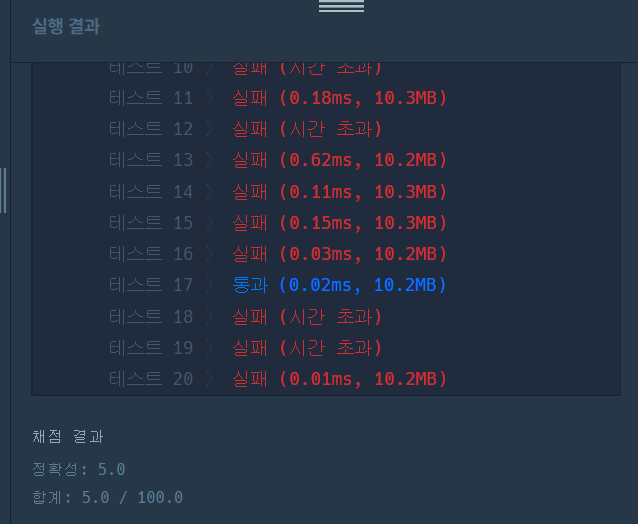

#### 참고한 코드
https://jainn.tistory.com/127

In [94]:
import heapq
def solution(jobs):
    answer = 0
    end, i = 0, 0
    start = -1
    hq = []
    while len(jobs)>i:
        for job in jobs:
            if start<job[0]<=end:
                heapq.heappush(hq, (job[1], job[0]))
        if len(hq)>0:
            now = heapq.heappop(hq)
            start = end
            end += now[0]
            answer += (end-now[1]) # 작업종료시간 - 호출시간
            i += 1
        else:
            end += 1
    answer = answer // len(jobs)
    return answer

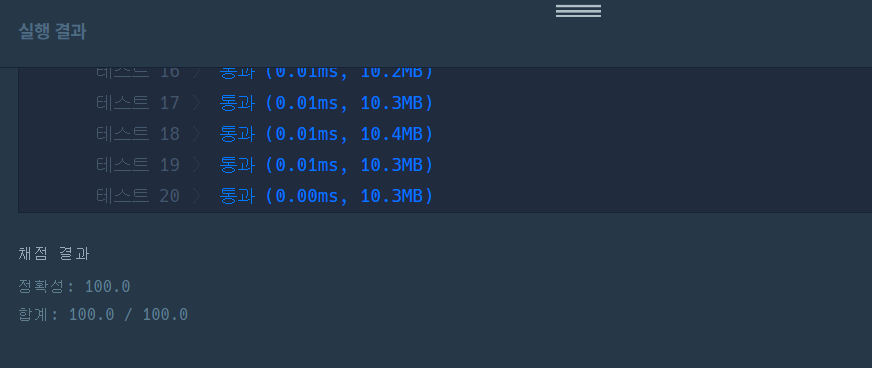

- 꼭 필요한 자료구조만 사용한다.
    - 내 풀이에서 3개의 리스트를 사용했는데 그럴 필요가 없다



- 이 문제에서는 heap을 사용해야 시간제한을 통과할 수 있다.

### heap을 사용해 코드 리팩토링 해보기